In [1]:
"""
nSimplices on toy example
"""
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import random as alea
from scipy.linalg import solve,pinv,pinv2
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA
import time

In [21]:
# Librairie nSimplices courante
exec(compile(open(r"nSimplices_final.py", encoding="utf8").read(), "nSimplices_new.py", 'exec'))
#execfile("/path-to-code/2021-04-01_nSimplices-lib.py")

# set matplotlib default savefig directory
#os.chdir("/data/user/my-directory/")
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above

In [22]:
### test data


data = pd.read_csv(r'datasets/Hmp_v13_lq/v13lqphylotypeQuantE.csv', sep=',',header=None,usecols=np.array(range(0,3)))
data.head()
data.shape
#df.sample(frac = 0.1)

(2255, 3)

In [23]:
### Traitement du fichier

y=pd.read_csv(r'datasets/Hmp_v13_lq/v13lqphylotypecounts-rownames-bodysites.csv', sep=';')
y=y.drop(['x'], axis=1)
y.head()
#
X=data
X.head()

#y['type'].hist()
ttab=np.asarray(y.drop_duplicates(subset = "type")).T
diff_types=ttab.tolist()[0]

tab=data

In [24]:
###Distances

""" euclidean distances """
N=tab.shape[0]
D=pdist(tab)
DSO=squareform(D)
D_TRUE=squareform(D)
# """ A few outliers along new axis """
# seed= 112 ; alea.seed(seed)
# sD=squareform(D)
# N=np.shape(sD)[0]
# pc=0.05 #proportion of outliers
# k=int(np.ceil(pc*N))
# # Tirage aléatoire de quelques points hors plan
# indices=np.sort(alea.sample(range(N),k))
# DSO=1.*sD
# for n in indices:
#     horsplan=50*alea.random()
#     print ("n,horsplan:"+str(n)+","+str(horsplan))
#     for m in [x for x in range(N) if x !=n]:
#         DSO[n,m]=DSO[m,n]=np.sqrt(DSO[n,m]**2+horsplan**2)

""" n = 3 , DSO """
n=3
Vn=[]
seed=245124512 ; alea.seed(seed)
for i in range(1000):
    indices2=alea.sample(range(N),n+1)
    Vn.append(nSimplexVolume(indices2,DSO))

#plt.hist(Vn) ; plt.show() # majorité nuls ou presque, un très petit nb ressort
#                          #   (comme ci-dessus, surement dû au bruit).

In [25]:
###nSimplices method
""" Parameters and formatting of input data """
cutoff=0.5
trim=0.9

# En entrée : DSO, qui contient quelques outliers hors-plan
lDSO=squareform(DSO) # shape DSO as other matrices, i.e. as a N*(N-1)/2-sized flat matrix.
data=squareform(lDSO)    #squareform( DNd ) #squareform(DNne)
#(D+1.*np.array(Noise)) ou 1e-6,1e-5,... 1., 10. *Noise
#D, Dd, DO, DOd, DSO, DNd. (Ddne)


""" Applications of nSimplices :
    - dimension detection
    - outlier detection
    - outliers are projected into relevant dimension
    - result : distance matrix to be used in classical MDS, for instance.
"""
print("\n Application of nSimplex \n ")
t1=time.time()
resu=nSimplwhichdim(data,cutoff,trim,ngmetric="rkurtosis",nf=5)
t2=time.time()
var = np.array(resu[0][3][0])**2 / (2*np.mean(data,0))
print (np.std(resu[0][3][0]) , np.std(resu[0][3][0] / np.sqrt(2*np.mean(data,0))), np.std( var ), 1.4826*np.median(abs(var-np.median(var))))



 Application of nSimplex 
 


NameError: name 'nSimplwhichdim' is not defined

NameError: name 'resu' is not defined

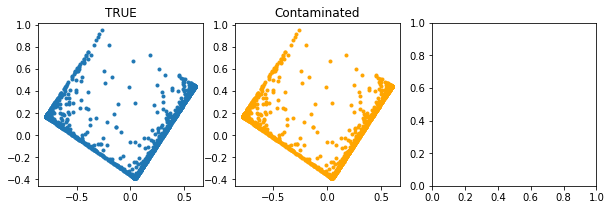

In [26]:
""" cMDS and plot """

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))
#fig.suptitle('Horizontally stacked subplots')
#
va, ve, Xe = cMDS(D_TRUE)
ax1.plot(Xe[:,0],Xe[:,1],'.')
ax1.set_title("TRUE")
#
va, ve, Xe = cMDS(DSO)
ax2.plot(Xe[:,0],Xe[:,1],'.', color='orange')
ax2.set_title("Contaminated")
#
va, ve, Xe = cMDS(resu[3][3])

Xe=pd.DataFrame(np.asarray([Xe[:,0],Xe[:,1]]).T, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([Xe, y], axis = 1)

targets = diff_types
#colors = ['b','r','g']

for target in targets:
    indicesToKeep = finalDf['type'] == target
    ax3.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']

               , s = 5)
#ax3.legend(targets)
ax3.grid()
plt.show()


# ax3.plot(Xe[:,0],Xe[:,1],'.', color='green')
# ax3.set_title("Restituted")
# plt.show()

In [ ]:
'''
### PCA

pca_method = PCA(n_components=2)
t3=time.time()
principalComponents_test1 = pca_method.fit_transform(data_test1)
t4=time.time()
Df_pc_test1=pd.DataFrame(data = principalComponents_test1
             , columns = ['principal component 1', 'principal component 2'])

# pca_method.components_

#plot le Df de PCA

Df_pc_test1['type']="normal"

for i in indices:

    Df_pc_test1.loc[i,'type']="contaminated"

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#colors = ['r', 'g', 'b']


targets = ["normal","contaminated"]
colors = ['b','r']

for target, color in zip(targets,colors):
    indicesToKeep = Df_pc_test1['type'] == target
    ax.scatter(Df_pc_test1.loc[indicesToKeep, 'principal component 1']
               , Df_pc_test1.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

###Temps d'exécution
print(" ")
T1=t2-t1
print(f"nSimplex tourne en {T1} s")
T2=t4-t3
print(f"PCA tourne en {T2} s")

'''

'\n### PCA\n\npca_method = PCA(n_components=2)\nt3=time.time()\nprincipalComponents_test1 = pca_method.fit_transform(data_test1)\nt4=time.time()\nDf_pc_test1=pd.DataFrame(data = principalComponents_test1\n             , columns = [\'principal component 1\', \'principal component 2\'])\n\n# pca_method.components_\n\n#plot le Df de PCA\n\nDf_pc_test1[\'type\']="normal"\n\nfor i in indices:\n\n    Df_pc_test1.loc[i,\'type\']="contaminated"\n\nfig = plt.figure(figsize=(4,4))\nax = fig.add_subplot(1,1,1)\nax.set_xlabel(\'Principal Component 1\', fontsize = 15)\nax.set_ylabel(\'Principal Component 2\', fontsize = 15)\nax.set_title(\'2 component PCA\', fontsize = 20)\n#targets = [\'Iris-setosa\', \'Iris-versicolor\', \'Iris-virginica\']\n#colors = [\'r\', \'g\', \'b\']\n\n\ntargets = ["normal","contaminated"]\ncolors = [\'b\',\'r\']\n\nfor target, color in zip(targets,colors):\n    indicesToKeep = Df_pc_test1[\'type\'] == target\n    ax.scatter(Df_pc_test1.loc[indicesToKeep, \'principal compo

In [ ]:
###ScreePlot Method (runs for too long)
cutoff=0.5
trim=0.9
coord=np.array(tab)
nb,dico_outlier,dico_h,rdim,cdata,cdata_proj,coord_corr=nSimpl_RelevantDim_ScreePlot(coord,DSO,cutoff,trim,n0=20,nf=21)


0.6666351931953279


KeyboardInterrupt: 

SystemExit: D must be symetric...

/Users/wanxinli/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


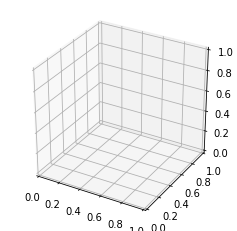

In [ ]:
###Points graphe

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

va, ve, Xe = cMDS(coord)

Xe=pd.DataFrame(np.asarray([Xe[:,0],Xe[:,1],Xe[:,2]]).T, columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([Xe, y], axis = 1)

targets = diff_types
#colors = ['b','r','g']

for target in targets:
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , s = 5)

plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))
#fig.suptitle('Horizontally stacked subplots')
#
va, ve, Xe = cMDS(D_TRUE)
ax1.plot(Xe[:,0],Xe[:,1],'.')
ax1.set_title("TRUE")
#
va, ve, Xe = cMDS(DSO)
ax2.plot(Xe[:,0],Xe[:,1],'.', color='orange')
ax2.set_title("Contaminated")
#
va, ve, Xe = cMDS(cdata)

Xe=pd.DataFrame(np.asarray([Xe[:,1],Xe[:,2]]).T, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([Xe, y], axis = 1)

targets = diff_types
#colors = ['b','r','g']

for target in targets:
    indicesToKeep = finalDf['type'] == target
    ax3.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']

               , s = 5)
#ax3.legend(targets)
ax3.grid()
plt.show()
